# Read ILC weights and residuals from the below folder.

### Weights and residuals are provided for MV, tSZ-free, and CIB-free CMB/kSZ ILC maps.

#### File locaiton: publish/data/ilc_weights_residuals.npy

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np, sys, os, scipy as sc, warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

#%pylab notebook
%matplotlib inline
from pylab import *


In [3]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'


In [4]:
#read file
fname = 'publish/data/ilc_weights_residuals.npy'
ilc_dict = np.load(fname, allow_pickle = True).item()
print(ilc_dict.keys())

#different types of ILC considered
ilc_keyname_arr = ilc_dict['ilc_keyname_arr']
print(ilc_keyname_arr)

#ILC weights
weights_dict = ilc_dict['weights']
print(weights_dict.keys())

#total ILC residuals
total_ilc_residuals_dict = ilc_dict['total_ilc_residuals']
print(total_ilc_residuals_dict.keys())

#el range
els = ilc_dict['el']

dict_keys(['weights', 'total_ilc_residuals', 'cl_signal_plus_noise', 'ilc_keyname_arr', 'el'])
['mv' 'tszfree' 'cibfree']
dict_keys(['s4_wide', 's4_deep', 'spt3g', 'spt4', 'so_baseline', 'so_goal'])
dict_keys(['s4_wide', 's4_deep', 'spt3g', 'spt4', 'so_baseline', 'so_goal'])


In [5]:
#experiment names and colours
exp_specs_dict = {'s4_wide': ['S4-Wide', 'darkgreen'], 
                  's4_deep': ['S4-Ultra Deep', 'navy'], 
                  'spt3g': ['SPT-3G', 'goldenrod'],
                  'spt4': ['SPT-3G+SPT-4', 'darkred'],
                  'so_baseline': ['SO-Baseline', 'darkorange'],
                  'so_goal': ['SO-Goal', 'royalblue']}

#ILC keynames
ilc_keyname_dict = {'mv':'MV', 'tszfree': 'tSZ-free', 'cibfree': 'CIB-free'}

#CMB spectrum
camb_fname = 'publish/data/cmb_cl_planck_2015_lensedCls.dat'
el_camb = np.loadtxt(camb_fname, usecols = [0])
dl_camb = np.loadtxt(camb_fname, usecols = [1,2,3,4])
Tcmb = 2.73 #Kelvin
cl_camb = ( Tcmb**2. * dl_camb * 2 * np.pi ) / ( el_camb[:,None] * (el_camb[:,None] + 1) )
cl_camb *= 1e12
cl_TT, cl_EE, cl_BB, cl_TE = cl_camb.T

dl_fac_camb = el_camb * (el_camb+1)/2/np.pi


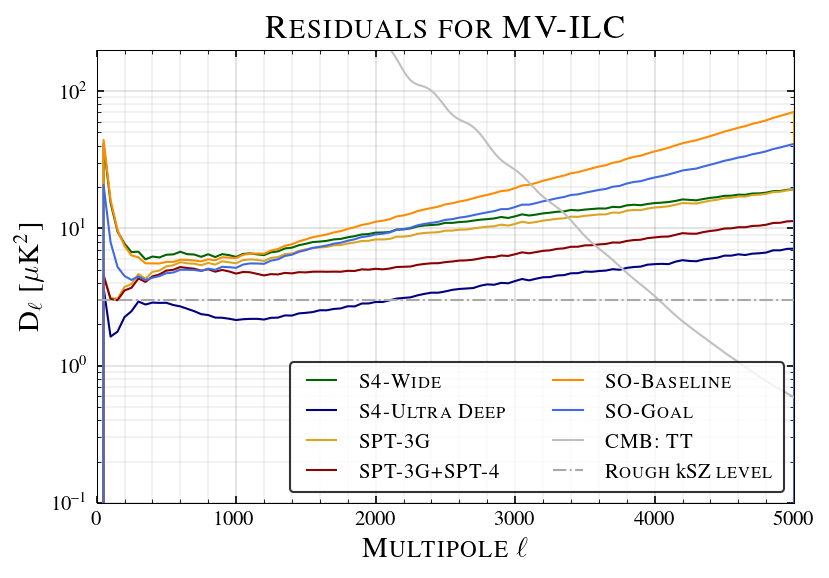

In [6]:
#MV ILC noise residuals for different experiments
reqd_ilc_keyname = 'mv'

clf()
fsval = 14
ax = subplot(111, yscale='log')
dl_fac = els * (els+1)/2/np.pi #show plot in D_l rather than C_l
for expname in total_ilc_residuals_dict:
    total_ilc_residual_mv = total_ilc_residuals_dict[expname][reqd_ilc_keyname]
    expname, colorval = exp_specs_dict[expname]
    #plot(els, dl_fac * total_ilc_residual_mv, lw = 1., color = colorval, label = r'\textsc{%s}' %(expname))

    if (1): #take mean for a certain \ell_range
        delta_el =50
        binned_els = np.arange(0, max(els), delta_el)
        binned_dl_fac = binned_els * (binned_els+1)/2/np.pi
        binned_total_ilc_residual_mv = np.interp( binned_els, els, total_ilc_residual_mv)
        plot(binned_els, binned_dl_fac * binned_total_ilc_residual_mv, lw = 1., color = colorval, label = r'\textsc{%s}' %(expname))

#CMB and expected kSZ level
plot(el_camb, dl_fac_camb * cl_TT, lw = 1., color = 'silver', label = r'\textsc{CMB: TT}')
axhline(3., lw = 1., color = 'darkgray', ls ='-.', label = r'\textsc{Rough {\rm kSZ} level}')

#title
title_str = r'\textsc{Residuals for %s-ILC' %(ilc_keyname_dict[reqd_ilc_keyname])
title(title_str, fontsize = fsval+2)

#legend
legend(loc = 4, fontsize = fsval-4, ncol = 2)

#labels
xlabel(r'\textsc{Multipole $\ell$}', fontsize = fsval)
ylabel(r'\textsc{D$_{\ell}$ [$\mu$K$^{2}$]}', fontsize = fsval)

#limits
xmin, xmax = 0, 5000.
ymin, ymax = 0.1, 2e2
xlim(xmin, xmax); ylim(ymin, ymax)

#grid
grid(which = 'major', axis = 'both', lw = 0.1, color = 'black')
grid(which = 'minor', axis = 'both', lw = 0.05, color = 'black')

#save
plname = 'plots/ilc_residuals_mv.pdf'
savefig(plname, dpi = 200.)
show()

In [ ]:
#read and show weights
reqd_ilc_keynme = 'mv'
reqd_expname = 's4_wide'
assert reqd_ilc_keynme in ilc_keyname_arr
assert reqd_expname in list( exp_specs_dict.keys() )

#frequency bands
if reqd_expname in ['s4_wide', 's4_deep', 'so_baseline', 'so_goal']:
    nu_arr = [95, 150, 220, 285]
elif reqd_expname == 'spt3g':
    nu_arr = [95, 150, 220]#, 600, 857]
elif reqd_expname == 'spt4':
    nu_arr = [95, 150, 220, 285, 345]
band_color_dict = {95: 'navy', 150: 'darkgreen', 220: 'goldenrod', 285: 'orangered', 345: 'darkred'}

#N_band x lmax array
weights_arr = weights_dict[reqd_expname][reqd_ilc_keynme]
print(weights_arr.shape)

#plot weights
fsval = 12
ax = subplot(111)

for w, nu in zip(weights_arr, nu_arr):
    plot(els, w, color = band_color_dict[nu], label = r'%s GHz' %(nu))

weights_sum = np.sum(weights_arr, axis = 0)
plot(els, weights_sum, color = 'black', ls = '-.', label = r'\textsc{Total}')
axhline(0., lw=0.5, color = 'gray')

#title
title_str = r'\textsc{Weights for %s-ILC: %s' %(ilc_keyname_dict[reqd_ilc_keyname], exp_specs_dict[reqd_expname][0])
title(title_str, fontsize = fsval+2)

#legend
legend(loc = 4, fontsize = fsval, ncol = 3, columnspacing=0.5)

#labels
xlabel(r'\textsc{Multipole $\ell$}', fontsize = fsval)
ylabel(r'\textsc{Weights W$_{\ell}$', fontsize = fsval)

#limits
xmin, xmax = 0, 5000.
ymin, ymax = -1.2, 1.2
xlim(xmin, xmax); ylim(ymin, ymax)

#grid
grid(which = 'major', axis = 'both', lw = 0.1, color = 'black')
grid(which = 'minor', axis = 'both', lw = 0.05, color = 'black')

#save
plname = 'plots/ilc_weights_%s_%s.pdf' %(reqd_ilc_keynme, reqd_expname)
savefig(plname, dpi = 200.)
show()

(4, 7000)
